In [67]:
f = open('data/kaggle_visible_evaluation_triplets.txt','r')
song_to_count = {} #frequency
user_to_song = {} #list of songs heard by each user
song_loop = {}
for line in f:
    user,song,loop_factor = line.strip().split('\t')
    if song in song_to_count:
        song_to_count[song] += 1
    else:
        song_to_count[song] = 1
    if user in user_to_song:
        user_to_song[user].add(song)
    else:
        user_to_song[user] = set([song])
    if song in song_loop:
        song_loop[song] += loop_factor
    else:
        song_loop[song] = loop_factor
f.close()

In [68]:
#songs ordered by frequency listened
songs_ordered = sorted(song_to_count.keys(),
                       key=lambda s: song_to_count[s], 
                       reverse=True)
loop_ordered = sorted(song_loop.keys(),
                     key=lambda s: song_loop[s],
                     reverse=True)

In [31]:
l = []
s = ['SOZVAUD12A8C136F3F',
 'SOGNTSV12A8C132C23',
 'SOAHPZT12AB017DED6',
 'SOFBJHH12A6D4FD7C8',
 'SOKQBWR12A6D4F7756',
 'SODAJVH12AAF3B499D',
 'SOUAHGM12A8C142415',
 'SOXZSWA12A67ADCF0C']
for song in s:
    l.append(loop_ordered.index(song))
    
sorted(l)

[9, 8, 6, 5, 3, 2, 1, 0]

In [32]:
l

[5, 1, 2, 3, 6, 8, 0, 9]

In [24]:
songs_ordered[:10]

['SOFRQTD12A81C233C0',
 'SOAUWYT12A81C206F1',
 'SOBONKR12A58A7A7E0',
 'SOAXGDH12A8C13F8A1',
 'SOSXLTC12AF72A7F54',
 'SONYKOW12AB01849C9',
 'SOEGIYH12A6D4FC0E3',
 'SODJWHY12A8C142CCE',
 'SOLFXKT12AB017E3E0',
 'SOFLJQZ12A6D4FADA6']

In [69]:
#Canonical list of users
f = open('data/kaggle_users.txt','r')
canonical_users = list(map(lambda line: line.strip(),
                     f.readlines()))
f.close()
list(canonical_users)[:2]

['fd50c4007b68a3737fe052d5a4f78ce8aa117f3d',
 'd7083f5e1d50c264277d624340edaaf3dc16095b']

In [70]:
#reduce file size, map song to int
f = open('data/kaggle_songs.txt','r')
song_to_index = dict(map(lambda line:
                        line.strip().split(' '),
                        f.readlines()))
f.close()
song_to_index['SOSOUKN12A8C13AB79']

'283892'

In [19]:
f = open('submission.txt','w')
for user in canonical_users:
    songs_to_recommend = []
    for song in songs_ordered:
        if len(songs_to_recommend) >=10:
            break
        if song not in user_to_song[user]:
            songs_to_recommend.append(song)
    indices = map(lambda s: song_to_index[s],
                 songs_to_recommend)
    f.write(' '.join(indices)+'\n')
f.close()

In [25]:
# Assumption 1: A song being listened to more than once = favorite song
# group users based on similar song listened
# find candidate set of songs
# order by loop_factor


In [94]:
type(user_to_song['fd50c4007b68a3737fe052d5a4f78ce8aa117f3d'])

set

In [71]:
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    return numer / denom

In [92]:
sorted(sim.values(),reverse=True)

[1.0,
 0.4,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.36363636363636365,
 0.36363636363636365,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3076923076923077,
 0.3076923076923077,
 0.3076923076923077,
 0.3076923076923077,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.2857142857142857,
 0.2777777777777778,
 0.2727272727272727,
 0.2727272727272727,
 0.2727272727272727,
 0.2727272727272727,
 0.2727272727272727,
 0.2727272727272727,
 0.2727272727272727,
 0.2727272727272727,
 0.2727272727272727,
 0.27272727

In [105]:
# Task 1 find similar users
target_user = input('Enter user id  ')#'458833ce4418010e61304b34b2c992e1cce63435'
sim = {}
if target_user in user_to_song.keys():
    target_user_songs = user_to_song[target_user]
else:
    print('apple')
for user in canonical_users:
    if (user == target_user):
        continue
    user_songs = user_to_song[user]
    sim[user] = Jaccard(target_user_songs,user_songs)
similar_users = sorted(sim.keys(),
                       key=lambda s: sim[s],
                       reverse=True)

# Task 2 find candidate songs
recommended_songs = []
for user in similar_users[:5]:
    for song in user_to_song[user]:
        if song not in target_user_songs:
            recommended_songs.append(song)
            
# Task 3 sort candidate song by loop_factor
loop = {}
for song in recommended_songs:
    loop[song]=loop_ordered.index(song)
recommended_songs_loop_index = sorted(loop.keys(),
                                     key=lambda s: loop[s])

# Final recommendation = recommended_songs_loop_index[:s10]


Enter user id  123


In [106]:
recommended_songs_loop_index[:10]

['SOEXOBH12A8AE45D9F',
 'SOUZIOW12A8C142A3E',
 'SOFHGAN12A6D4F8C8D',
 'SOKUCXB12A6D4FAC0C',
 'SOLHWOG12A81C224DA',
 'SOCCKRK12A6701FF69',
 'SOHKPPF12A67020E0A',
 'SOLIPLG12A58A7A354',
 'SOLNWDI12A8C13B951',
 'SOKXBUV12A6D4FBAE6']

In [75]:
#Get song names
import sqlite3
import random
conn = sqlite3.connect('data/track_metadata.db')

In [83]:
q = "SELECT song_id, title FROM songs"
res = conn.execute(q)
complete_song_list = res.fetchall()

In [102]:
uid = input("enter your new user id")
options = []
while len(options)<5:
    sample = random.choice(complete_song_list)
    if sample not in options:
        ans = input(f'Do you like {sample[1]}, enter y is yes')
        if ans=='y':
            options.append(sample[0])
options = set(options)
user_to_song[uid] = options

enter your new user id123
Do you like Johnny Come Home, enter y is yesy
Do you like With You I'm Born Again, enter y is yesy
Do you like Runaway, enter y is yesn
Do you like Street Of My Dreams, enter y is yesy
Do you like Shes Got That Light, enter y is yesy
Do you like Just Cause I Can, enter y is yesn
Do you like Bus Stop (Album Version), enter y is yesn
Do you like Say Goodnight (Album Version), enter y is yesy


In [103]:
user_to_song['123']

{'SODDEYF12AC468A0F9',
 'SOEJGUO12A8AE48C5B',
 'SOSVMLS12A6D4FCE9D',
 'SOTHIFX12A6D4F95A5',
 'SOXLBIK12AB0181FC5'}

In [107]:

l = []
for song in recommended_songs_loop_index[:10]:
    q = "SELECT song_id, title FROM songs where song_id == ?"
    res = conn.execute(q,(song,))
    l.append(res.fetchall())

#q ="SELECT sql FROM sqlite_master WHERE tbl_name = 'songs' AND type = 'table'"

#res.fetchall()

# columns : (track_id text PRIMARY KEY, 
#title text, song_id text, release text, 
#artist_id text, artist_mbid text, 
#artist_name text, duration real, 
#artist_familiarity real, artist_hotttnesss real, year int)


In [108]:
song_name_list = []
for i in l:
    for j,k in i:
        print(k)
        song_name_list.append(k)

Always The Sun
Chuck E's In Love (LP Version)
Behind The Sun
Caught Up In You
Big Yellow Taxi (Remastered LP Version)
Mad Situation
Love To Hate You
Ding dong song (Lounge)
Cracklin Rosie
Breakin'...There's No Stopping Us


In [2]:
import requests
from bs4 import BeautifulSoup
import urllib.parse
import json


class YoutubeSearch:

    def __init__(self, search_terms: str, max_results=None):
        self.search_terms = search_terms
        self.max_results = max_results
        self.videos = self.search()

    def search(self):
        encoded_search = urllib.parse.quote(self.search_terms)
        BASE_URL = "https://youtube.com"
        url = f"{BASE_URL}/results?search_query={encoded_search}&pbj=1"
        response = BeautifulSoup(requests.get(url).text, "html.parser")
        results = self.parse_html(response)
        if self.max_results is not None and len(results) > self.max_results:
            return results[:self.max_results]
        return results

    def parse_html(self, soup):
        results = []
        for video in soup.select(".yt-uix-tile-link"):
            if video["href"].startswith("/watch?v="):
                video_info = {
                    "title": video["title"],
                    "link": video["href"],
                    "id": video["href"][video["href"].index("=")+1:]
                }
                results.append(video_info)
        return results

    def to_dict(self):
        return self.videos

    def to_json(self):
        return json.dumps({"videos": self.videos})

In [110]:
youtube_links={}
for song in song_name_list:
    results = YoutubeSearch(song, max_results=1).to_dict()
    #print(results)
    q = results[0]['link'].split('=')[1]
    #YouTubeVideo(q, width=800, height=300)
    youtube_links[song] = q



0 Always The Sun
1 Chuck E's In Love (LP Version)
2 Behind The Sun
3 Caught Up In You
4 Big Yellow Taxi (Remastered LP Version)
5 Mad Situation
6 Love To Hate You
7 Ding dong song (Lounge)
8 Cracklin Rosie
9 Breakin'...There's No Stopping Us
enter song name to play Always The Sun


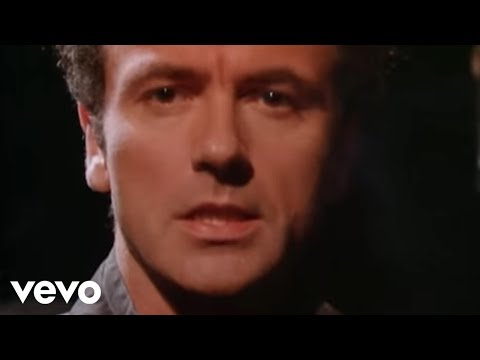

In [111]:
for i,j in enumerate(youtube_links.keys()):
    print(i,j)
sid = input("enter song name to play ")
YouTubeVideo(youtube_links[sid], width=800, height=300)